In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
file_path = "/home001/yousung.choi/projects/project_coordination/tools/1_datasets/1_video/Rainbow_Test/"
file_name = None
for file in os.listdir(file_path):
    if file.startswith('put'):
#     if file.startswith('9013'):
        print(file)
        file_name = file



putter.mp4


In [5]:
video_file = os.path.join(file_path, file_name)
print(video_file)

/home001/yousung.choi/projects/project_coordination/tools/1_datasets/1_video/Rainbow_Test/putter.mp4


total frames : 1020.0
invalid frame num :  804.0
invalid frame num :  805.0
invalid frame num :  808.0
invalid frame num :  875.0
invalid frame num :  876.0
invalid frame num :  877.0
invalid frame num :  878.0
invalid frame num :  880.0
invalid frame num :  881.0
invalid frame num :  882.0
invalid frame num :  883.0
invalid frame num :  884.0
invalid frame num :  885.0
invalid frame num :  886.0
invalid frame num :  887.0
invalid frame num :  888.0
invalid frame num :  889.0
invalid frame num :  890.0
invalid frame num :  891.0
invalid frame num :  893.0
invalid frame num :  894.0
invalid frame num :  895.0
invalid frame num :  896.0
invalid frame num :  897.0
invalid frame num :  898.0
invalid frame num :  899.0
invalid frame num :  900.0
invalid frame num :  901.0
invalid frame num :  902.0
invalid frame num :  903.0
invalid frame num :  904.0
invalid frame num :  905.0
invalid frame num :  906.0
invalid frame num :  907.0
invalid frame num :  908.0
invalid frame num :  909.0
invali

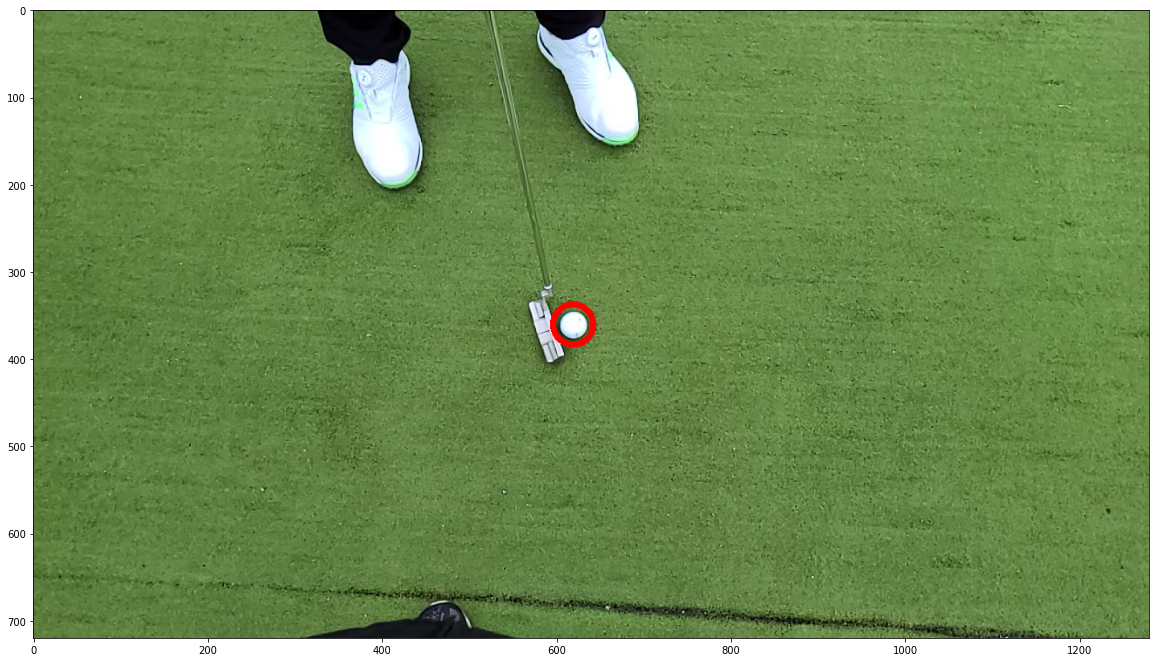

In [51]:
cap = cv2.VideoCapture(video_file)
print("total frames :", cap.get(cv2.CAP_PROP_FRAME_COUNT))

circle_len = []
x = []
y = []
while(cap.isOpened()):
    ret, frame = cap.read()
    # if valid frame
    if ret:
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        image_gray_blur = cv2.GaussianBlur(image, (3,3), 0)
#         circles = cv2.HoughCircles(image_gray_blur, cv2.HOUGH_GRADIENT, 1, 100, param1=150, param2=30, minRadius=10, maxRadius=20) # original image marginal value
        circles = cv2.HoughCircles(image_gray_blur, cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=25, minRadius=10, maxRadius=20) # original image marginal value
        
        # if first frame comes,       
        if cap.get(cv2.CAP_PROP_POS_FRAMES) == 1:            
            new_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            for i in circles[0]:
                cv2.circle(new_image, (i[0], i[1]), int(i[2]+8), (255, 0, 0), 5)
                
            plt.imshow(new_image)
        
#         elif cap.get(cv2.CAP_PROP_POS_FRAMES) == 100:
#             break
        if circles is not None:
            circle_len.append(len(circles))
            x.append(circles[0][0][0])
            y.append(circles[0][0][1])
        else:
            print('invalid frame num : ', cap.get(cv2.CAP_PROP_POS_FRAMES))
            
        
    # if not vaild frame (EOF)
    else:
        break
        
cap.release()



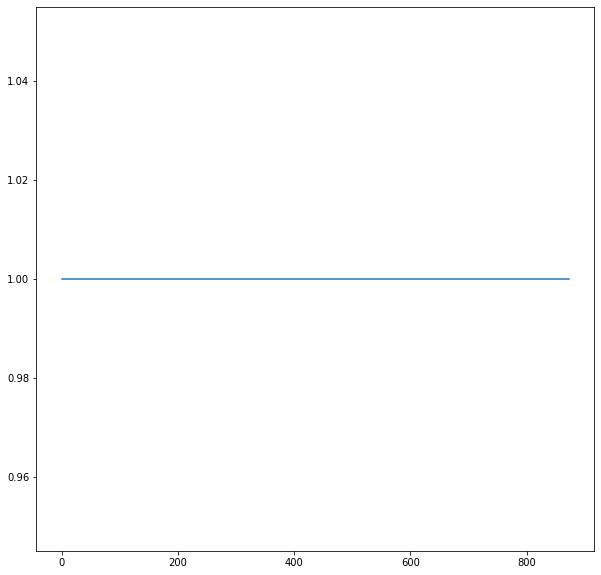

In [52]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(circle_len)

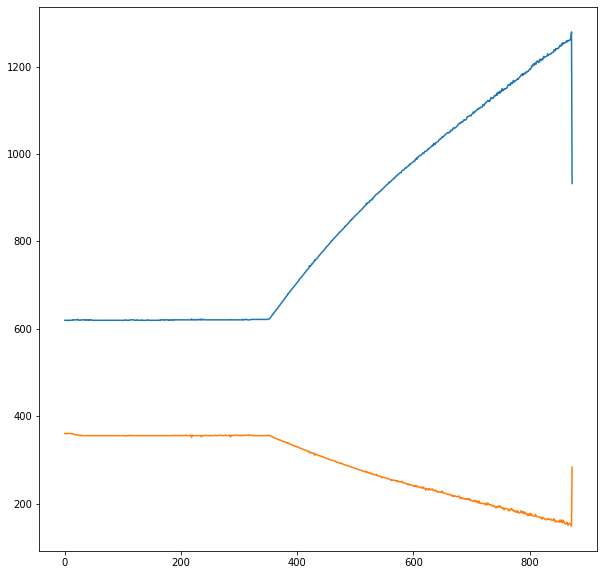

In [53]:
plt.plot(x)
plt.plot(y)

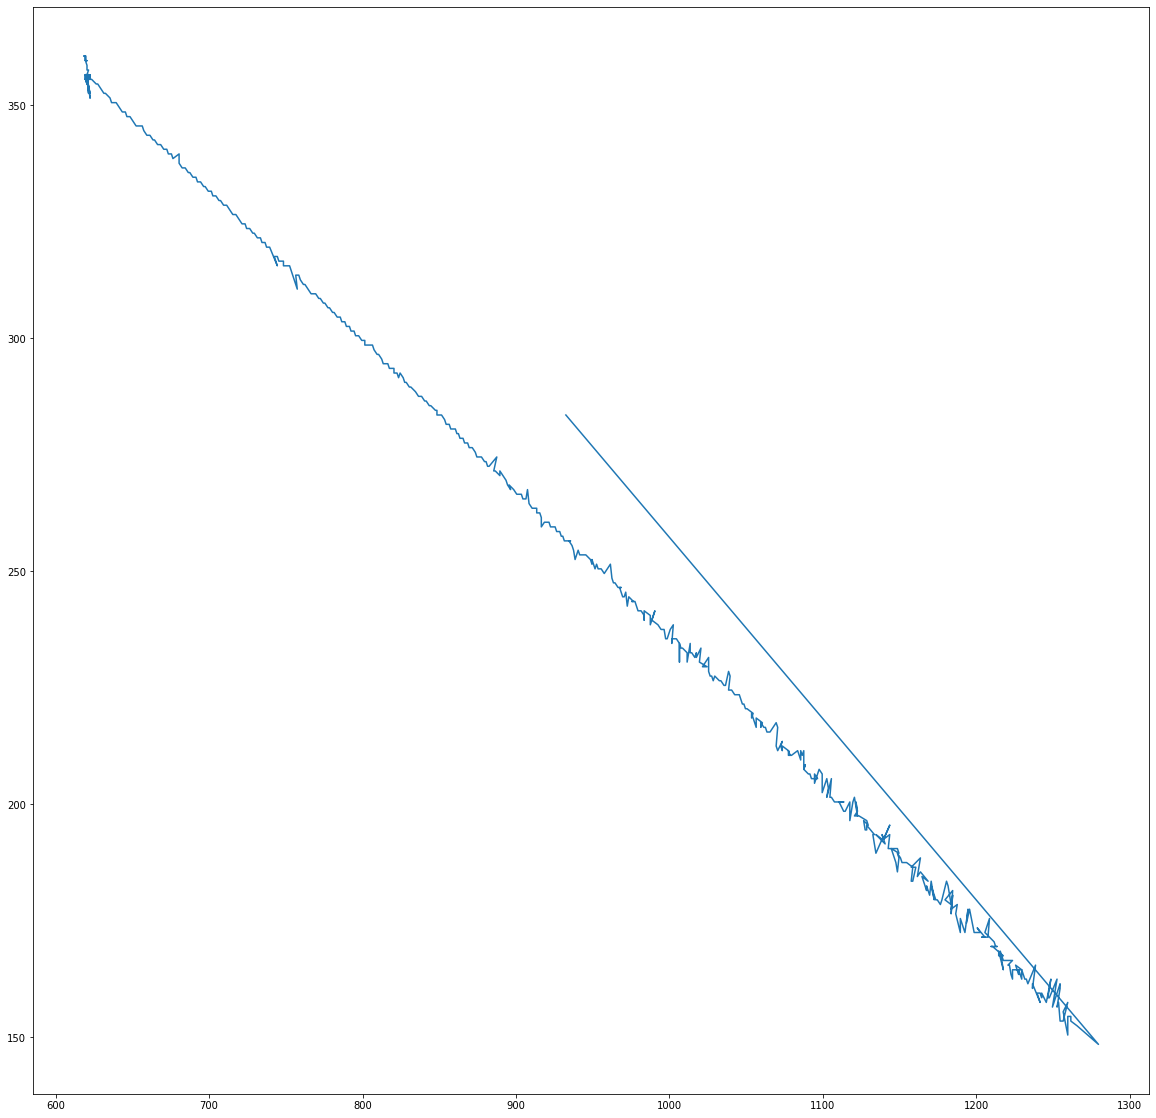

In [55]:
plt.plot(x, y)

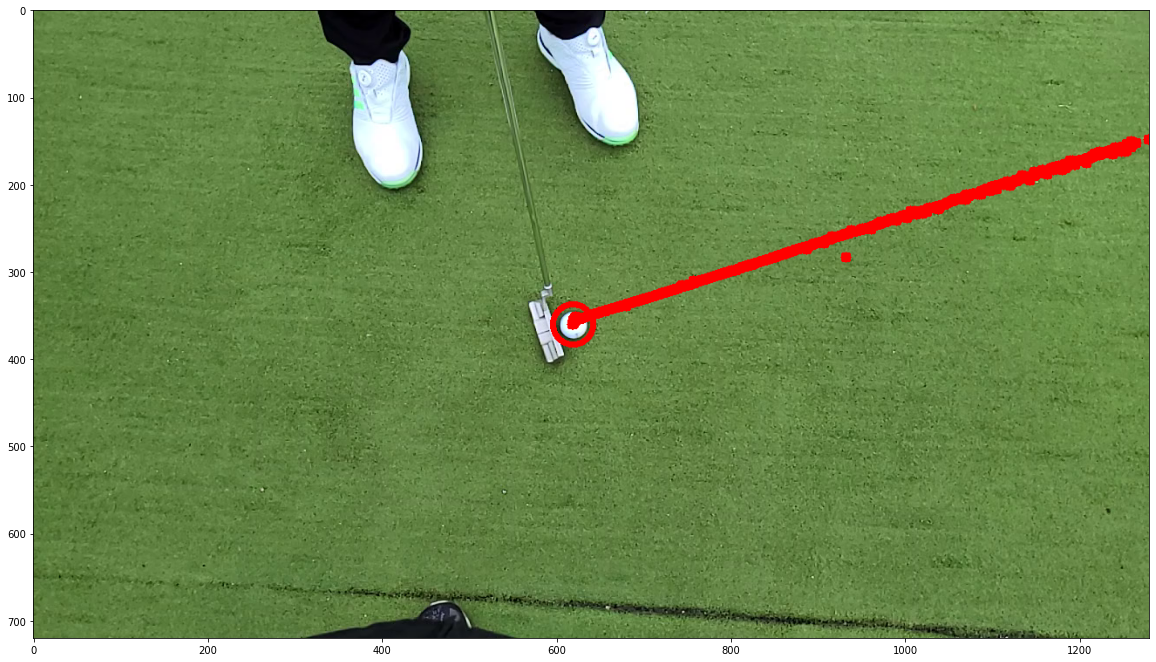

In [57]:
draw_image = new_image


for a, b in zip(x, y):
    cv2.circle(draw_image, (a, b), 1, (255, 0, 0), 10)

plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(draw_image)